**Table of contents**<a id='toc0_'></a>    
- [dataset merge function](#toc1_1_1_)    
    - [Combinining Dataset](#toc1_1_2_)    
  - [cleaning up dateset](#toc1_2_)    
    - [Plot values](#toc1_2_1_)    
    - [Drop index/periodDateUTC value](#toc1_2_2_)    
    - [check the correlation between features and unemployment](#toc1_2_3_)    
    - [check for correlation between all features](#toc1_2_4_)    
    - [Feature Selection](#toc1_2_5_)    
- [Logistic Regression](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np


### <a id='toc1_1_1_'></a>[dataset merge function](#toc0_)

In [95]:
def getMergedDf(final_df, df, name):
    partial_df = df[['periodDateUtc', 'actual']]
    partial_df.rename(columns={'actual': name}, inplace=True)

    #convert to datetime
    final_df['periodDateUtc'] = pd.to_datetime(final_df['periodDateUtc'], utc=True)
    partial_df['periodDateUtc'] = pd.to_datetime(partial_df['periodDateUtc'], utc=True)

    #get only year and month
    final_df['periodDateUtc'] = final_df['periodDateUtc'].dt.strftime('%Y-%m')
    partial_df['periodDateUtc'] = partial_df['periodDateUtc'].dt.strftime('%Y-%m')

    # for column in partial_df.columns:
    #     partial_df[column].fillna(method="ffill", inplace=True)

    final_df = final_df.merge(partial_df, on='periodDateUtc', how='outer')

    # # Convert 'periodDateUtc' to datetime (if needed)
    # merged_df["periodDateUtc"] = pd.to_datetime(merged_df["periodDateUtc"])

    return final_df

### <a id='toc1_1_2_'></a>[Combinining Dataset](#toc0_)

In [96]:
# Read the JSON file into a pandas DataFrame
file_path = "./data/USD_Manufacturing_PMI.json"
ManufacturingPMI = pd.read_json(file_path)

file_path = "./data/USD_Unemployment_Rate.json"
UnemploymentRate = pd.read_json(file_path)

file_path = "./data/USD_Services_PMI.json"
ServicesPMI = pd.read_json(file_path)

file_path = "./data/USD - Industrial Production (MoM).json"
IndustrialProduction = pd.read_json(file_path)

file_path = "./data/USD - Average Hourly Earnings (MoM).json"
AverageHourlyEarnings = pd.read_json(file_path)

file_path = "./data/USD - Monthly Budget Statement.json"
MonthlyBudget = pd.read_json(file_path)

file_path = "./data/USD - OLTS Job Openings.json"
OLTSJobOpenings = pd.read_json(file_path)

file_path = "./data/USD - Producer Price Index ex Food & Energy (MoM).json"
ProducerPriceIndex_FoodEnergyMoM = pd.read_json(file_path)

file_path = "./data/USD - Producer Price Index ex Food & Energy (YoY).json"
ProducerPriceIndex_FoodEnergyYoY = pd.read_json(file_path)

file_path = "./data/USD - Retail Sales (MoM).json"
RetailSales = pd.read_json(file_path)

file_path = "./data/USD - Retail Sales Control Group.json"
RetailSalesControlGroup = pd.read_json(file_path)

file_path = "./data/USD - UoM 5-year Consumer Inflation Expectation.json"
ConsumerInflationExpectation = pd.read_json(file_path)

file_path = "./data/USD_ ISM_Manufacturing_Prices_Paid.json"
ManufacturingPricesPaid = pd.read_json(file_path)

file_path = "./data/USD_Composite_PMI.json"
CompositePMI = pd.read_json(file_path)

file_path = "./data/USD_Factory_Orders_MoM.json"
FactoryOrders = pd.read_json(file_path)

file_path = "./data/USD_Manufacturing_Employment_Index_ISM.json"
ManufacturingEmploymentIndex = pd.read_json(file_path)

file_path = "./data/USD_Manufacturing_New_Orders_Index_ISM.json"
ManufacturingNewOrdersIndex = pd.read_json(file_path)

file_path = "./data/USD_ISM_Manufacturing_PMI.json"
ISMManufacturing = pd.read_json(file_path)


final_df = pd.DataFrame()

final_df["periodDateUtc"] = UnemploymentRate["periodDateUtc"]
final_df["unemployment"] = UnemploymentRate["actual"]

final_df = getMergedDf(final_df, ManufacturingPMI, "ManufacturingPMI")
final_df = getMergedDf(final_df, ServicesPMI, "ServicesPMI")
final_df = getMergedDf(final_df, IndustrialProduction, "IndustrialProduction")
final_df = getMergedDf(final_df, AverageHourlyEarnings, "AverageHourlyEarnings")
final_df = getMergedDf(final_df, MonthlyBudget, "MonthlyBudget")
final_df = getMergedDf(final_df, OLTSJobOpenings, "OLTSJobOpenings")
final_df = getMergedDf(final_df, ProducerPriceIndex_FoodEnergyMoM, "ProducerPriceIndex_FoodEnergyMoM")
final_df = getMergedDf(final_df, ProducerPriceIndex_FoodEnergyYoY, "ProducerPriceIndex_FoodEnergyYoY")
final_df = getMergedDf(final_df, RetailSales, "RetailSales")
final_df = getMergedDf(final_df, RetailSalesControlGroup, "RetailSalesControlGroup")
final_df = getMergedDf(final_df, ConsumerInflationExpectation, "ConsumerInflationExpectation")
final_df = getMergedDf(final_df, ManufacturingPricesPaid, "ManufacturingPricesPaid")
final_df = getMergedDf(final_df, CompositePMI, "CompositePMI")
final_df = getMergedDf(final_df, FactoryOrders, "FactoryOrders")
final_df = getMergedDf(final_df, ManufacturingEmploymentIndex, "ManufacturingEmploymentIndex")
final_df = getMergedDf(final_df, ManufacturingNewOrdersIndex, "ManufacturingNewOrdersIndex")
final_df = getMergedDf(final_df, ISMManufacturing, "ISMManufacturing")



C:\Users\ACER\AppData\Local\Temp\ipykernel_2456\2598566058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df.rename(columns={'actual': name}, inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2456\2598566058.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df['periodDateUtc'] = pd.to_datetime(partial_df['periodDateUtc'], utc=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2456\2598566058.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

## <a id='toc1_2_'></a>[cleaning up dateset](#toc0_)

In [111]:
#remove data i fperiodDataUTC is null
final_df = final_df.dropna(subset=['periodDateUtc']);

#first fill previous value if there is not a previous value fill 0
for column in final_df.columns:
    final_df[column].fillna(method="ffill", inplace=True)
    final_df[column].fillna(0, inplace=True)
    
print(final_df.tail(10))

KeyError: ['periodDateUtc']

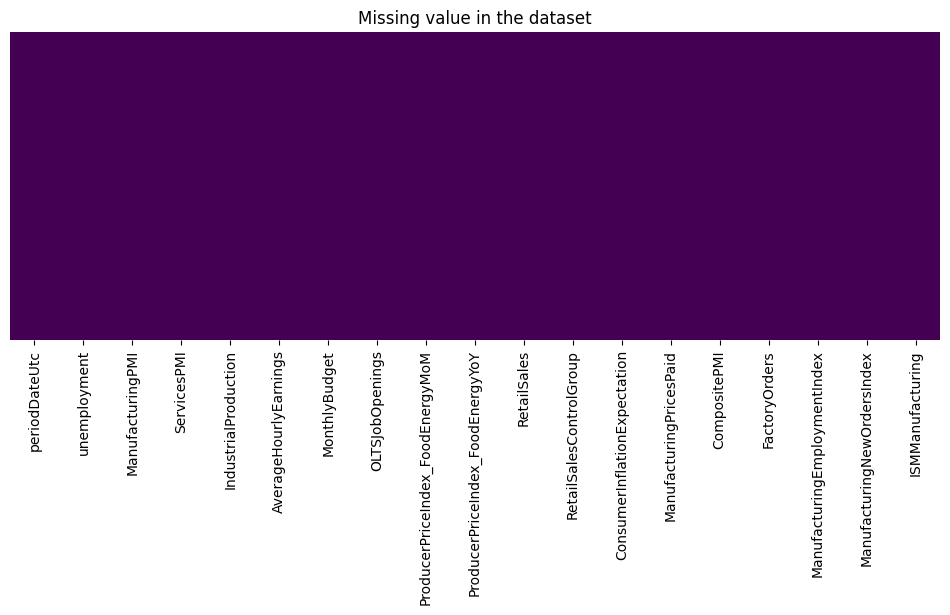

In [98]:
plt.figure(figsize=(12,4))
sns.heatmap(final_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

### <a id='toc1_2_1_'></a>[Plot values](#toc0_)

In [99]:
# plt.plot(final_df['periodDateUtc'], final_df['ManufacturingPMI'], label='ManufacturingPMI')
# plt.plot(final_df['periodDateUtc'], final_df['ManufacturingPricesPaid'], label='ManufacturingPricesPaid')
# plt.plot(final_df['periodDateUtc'], final_df['CompositePMI'], label='CompositePMI')
# # plt.plot(final_df['periodDateUtc'], final_df['ManufacturingEmploymentIndex'], label='ManufacturingEmploymentIndex')
# plt.plot(final_df['periodDateUtc'], final_df['ManufacturingNewOrdersIndex'], label='ManufacturingNewOrdersIndex')
# plt.plot(final_df['periodDateUtc'], final_df['ISMManufacturing'], label='ISMManufacturing')
# plt.plot(final_df['periodDateUtc'], final_df['ServicesPMI'], label='ServicesPMI')

# # plt.plot(final_df['periodDateUtc'], final_df['unemployment'], label='unemployment')
# # plt.plot(final_df['periodDateUtc'], final_df['services'], label='services')
# # plt.plot(final_df['periodDateUtc'], final_df['IndustrialProduction'], label='IndustrialProduction')
# # plt.plot(final_df['periodDateUtc'], final_df['AverageHourlyEarnings'], label='AverageHourlyEarnings')
# # # plt.plot(final_df['periodDateUtc'], final_df['MonthlyBudget'], label='MonthlyBudget')
# # plt.plot(final_df['periodDateUtc'], final_df['OLTSJobOpenings'], label='OLTSJobOpenings')
# # plt.plot(final_df['periodDateUtc'], final_df['ProducerPriceIndex_FoodEnergyMoM'], label='ProducerPriceIndex_FoodEnergyMoM')
# # plt.plot(final_df['periodDateUtc'], final_df['ProducerPriceIndex_FoodEnergyYoY'], label='ProducerPriceIndex_FoodEnergyYoY')
# # plt.plot(final_df['periodDateUtc'], final_df['RetailSales'], label='RetailSales')
# # plt.plot(final_df['periodDateUtc'], final_df['RetailSalesControlGroup'], label='RetailSalesControlGroup')
# # plt.plot(final_df['periodDateUtc'], final_df['ConsumerInflationExpectation'], label='ConsumerInflationExpectation')
# # plt.plot(final_df['periodDateUtc'], final_df['FactoryOrders'], label='FactoryOrders')


# plt.legend()
# plt.tight_layout()  # Optional: Adjust the layout for better spacing
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))


# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.title('Line Plot')
# plt.show()

In [100]:
# plt.plot(final_df['periodDateUtc'], final_df['unemployment'], label='unemployment')
# plt.plot(final_df['periodDateUtc'], final_df['OLTSJobOpenings'], label='OLTSJobOpenings')
# plt.plot(final_df['periodDateUtc'], final_df['ProducerPriceIndex_FoodEnergyMoM'], label='ProducerPriceIndex_FoodEnergyMoM')
# plt.plot(final_df['periodDateUtc'], final_df['ProducerPriceIndex_FoodEnergyYoY'], label='ProducerPriceIndex_FoodEnergyYoY')
# # plt.plot(final_df['periodDateUtc'], final_df['ConsumerInflationExpectation'], label='ConsumerInflationExpectation')

# # plt.plot(final_df['periodDateUtc'], final_df['RetailSales'], label='RetailSales')
# # plt.plot(final_df['periodDateUtc'], final_df['RetailSalesControlGroup'], label='RetailSalesControlGroup')
# # plt.plot(final_df['periodDateUtc'], final_df['IndustrialProduction'], label='IndustrialProduction')
# # plt.plot(final_df['periodDateUtc'], final_df['AverageHourlyEarnings'], label='AverageHourlyEarnings')
# # plt.plot(final_df['periodDateUtc'], final_df['FactoryOrders'], label='FactoryOrders')
# # plt.plot(final_df['periodDateUtc'], final_df['MonthlyBudget'], label='MonthlyBudget')

# plt.legend()
# plt.tight_layout()  # Optional: Adjust the layout for better spacing
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))


# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.title('Line Plot')
# plt.show()

In [101]:
# plt.plot(final_df['periodDateUtc'], final_df['RetailSales'], label='RetailSales')
# plt.plot(final_df['periodDateUtc'], final_df['RetailSalesControlGroup'], label='RetailSalesControlGroup')
# plt.plot(final_df['periodDateUtc'], final_df['IndustrialProduction'], label='IndustrialProduction')
# plt.plot(final_df['periodDateUtc'], final_df['FactoryOrders'], label='FactoryOrders')


# # plt.plot(final_df['periodDateUtc'], final_df['AverageHourlyEarnings'], label='AverageHourlyEarnings')
# # plt.plot(final_df['periodDateUtc'], final_df['MonthlyBudget'], label='MonthlyBudget')
# plt.legend()
# plt.tight_layout()  # Optional: Adjust the layout for better spacing
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))


# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.title('Line Plot')
# plt.show()

In [102]:
# plt.plot(final_df['periodDateUtc'], final_df['AverageHourlyEarnings'], label='AverageHourlyEarnings')
# # plt.plot(final_df['periodDateUtc'], final_df['MonthlyBudget'], label='MonthlyBudget')
# plt.legend()
# plt.tight_layout()  # Optional: Adjust the layout for better spacing
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))


# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.title('Line Plot')
# plt.show()

In [103]:
# plt.plot(final_df['periodDateUtc'], final_df['MonthlyBudget'], label='MonthlyBudget')
# plt.legend()
# plt.tight_layout()  # Optional: Adjust the layout for better spacing
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))


# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.title('Line Plot')
# plt.show()

### <a id='toc1_2_2_'></a>[Drop index/periodDateUTC value](#toc0_)

In [104]:
final_df = final_df.drop('periodDateUtc', axis=1)

### <a id='toc1_2_3_'></a>[check the correlation between features and unemployment](#toc0_)

The correlation coefficient ranges from -1 to 1:</br></br>

If the correlation coefficient is close to 1, it indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. </br>
If the correlation coefficient is close to -1, it indicates a strong negative correlation, meaning that as one variable increases, the other tends to decrease. </br>
If the correlation coefficient is close to 0, it indicates a weak or no linear correlation between the two variables.</br>

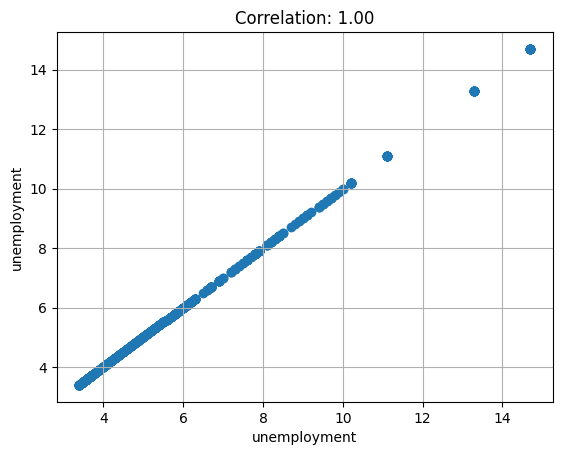

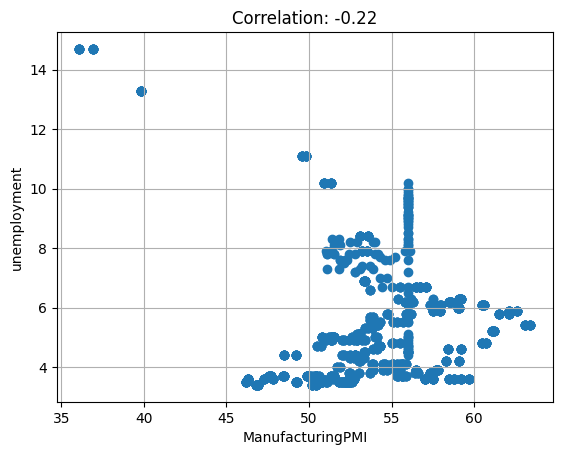

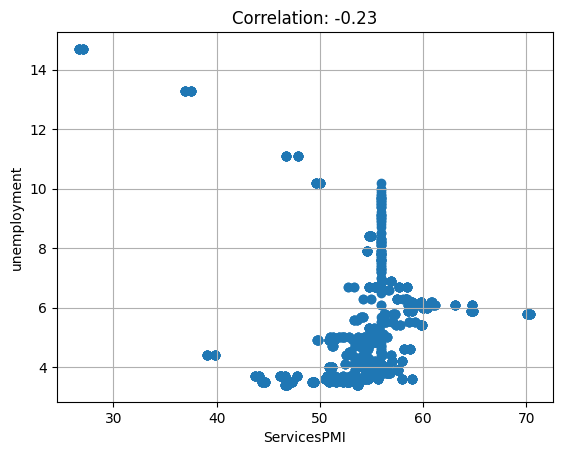

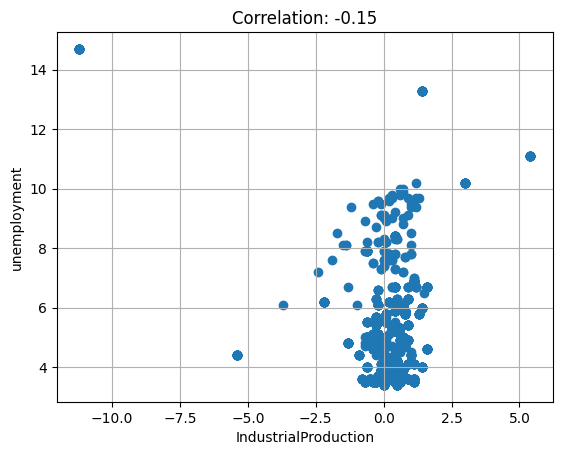

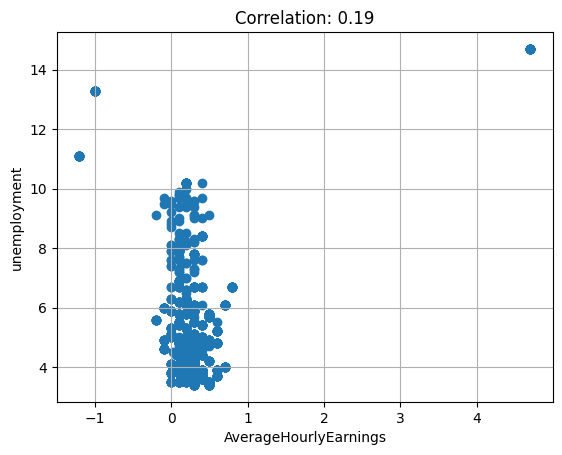

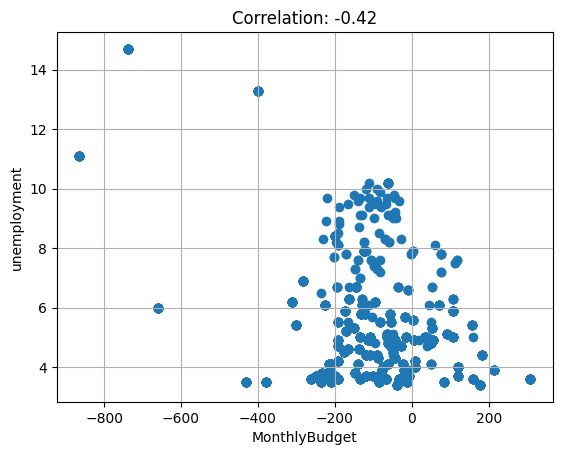

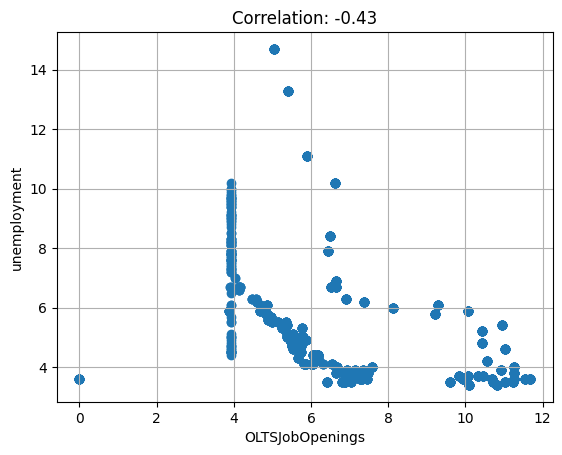

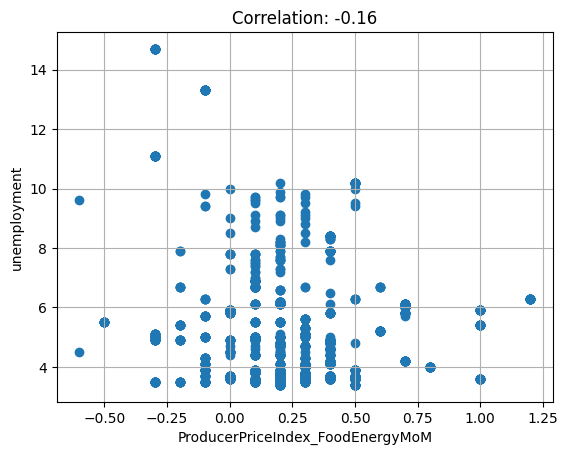

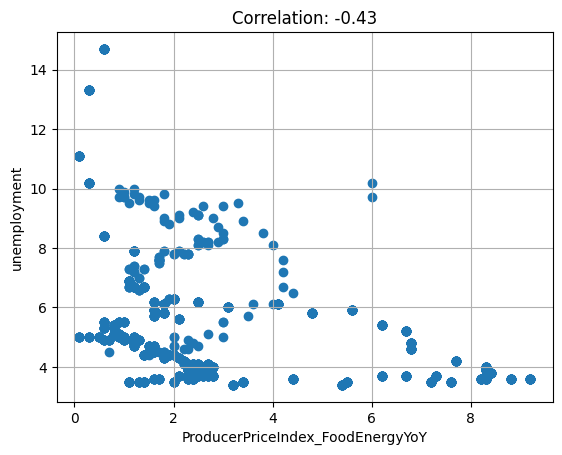

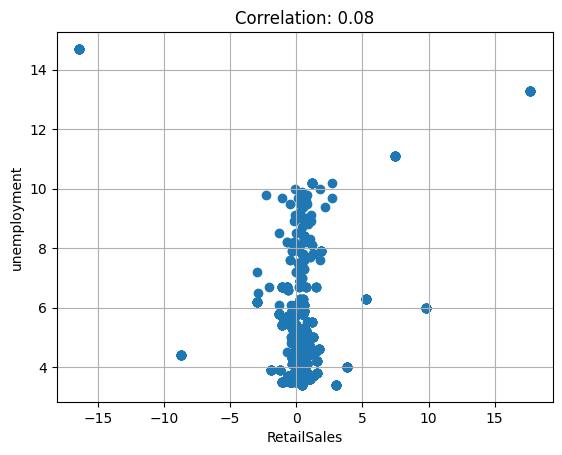

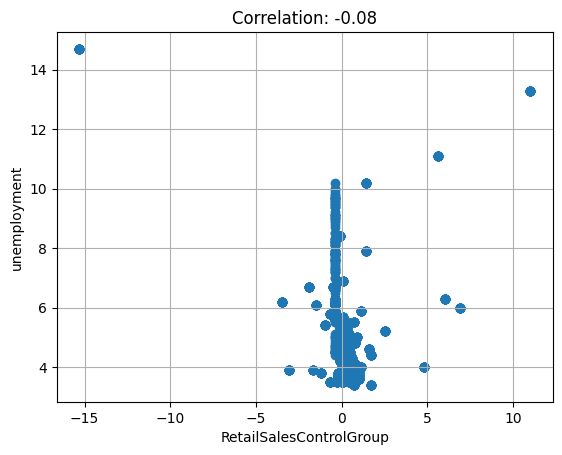

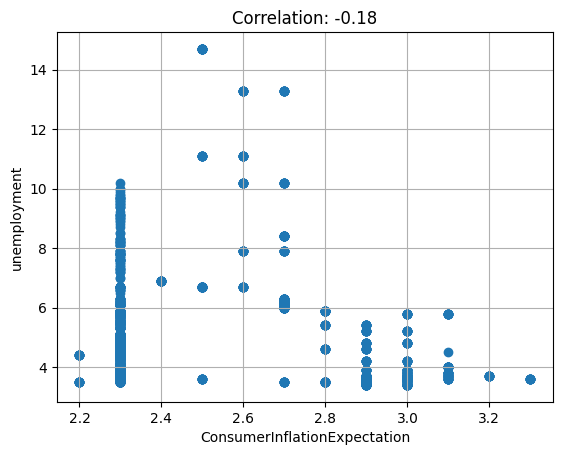

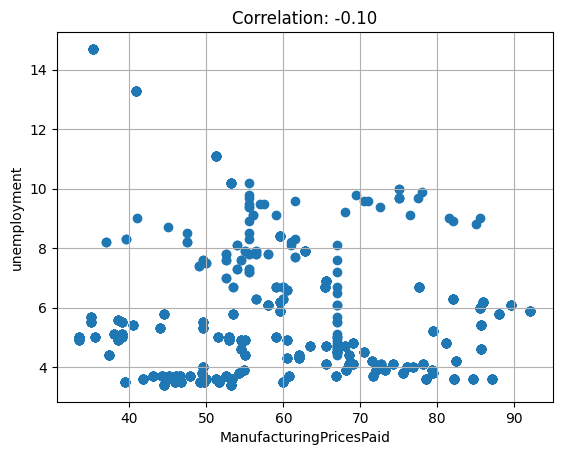

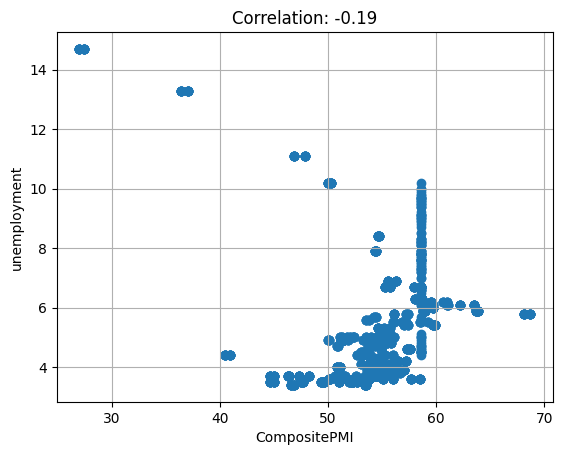

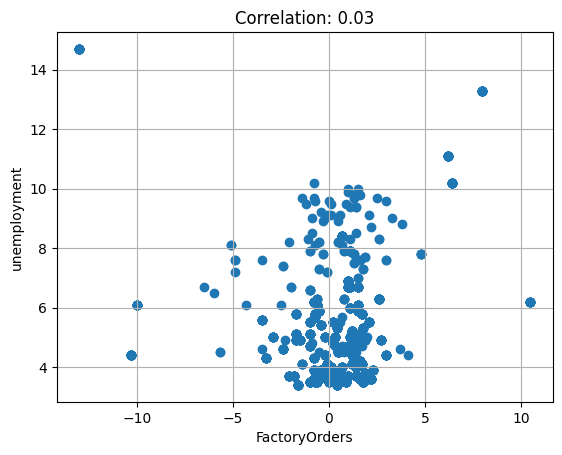

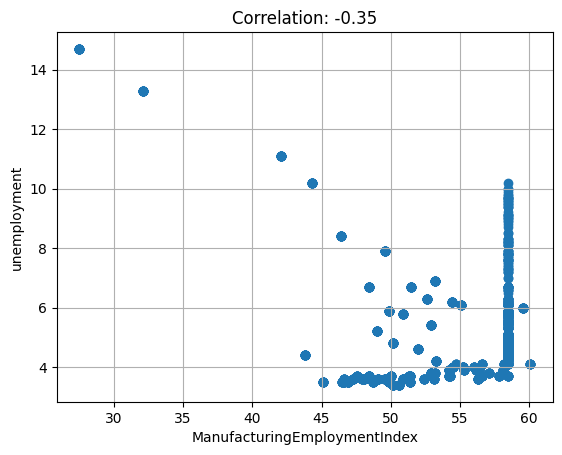

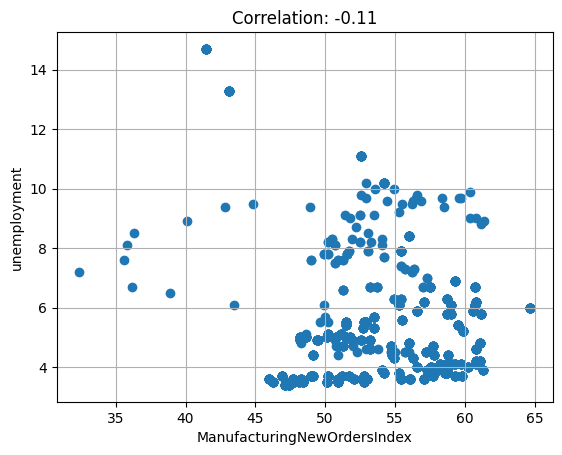

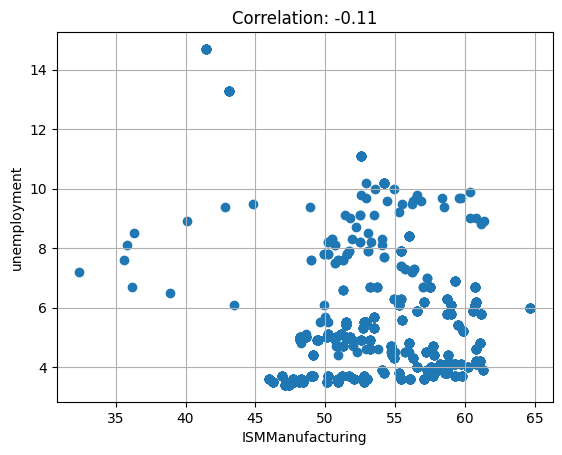

In [105]:
for column in final_df.columns:
    correlation = final_df[column].corr(final_df['unemployment'])

    # Plot a scatter plot to visualize the correlation
    plt.scatter( final_df[column], final_df['unemployment'])
    plt.xlabel(column)
    plt.ylabel('unemployment')
    plt.title(f'Correlation: {correlation:.2f}')
    plt.grid(True)
    plt.show()

### <a id='toc1_2_4_'></a>[check for correlation between all features](#toc0_)

In [117]:
numeric_df = final_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

# Define a threshold for high correlation
threshold = 0.7

# Select highly correlated features
multicollinear_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            multicollinear_features.add(colname_i)
            multicollinear_features.add(colname_j)

print("Multicollinear Features:", multicollinear_features)

                                  unemployment  ManufacturingPMI  ServicesPMI  \
unemployment                          1.000000         -0.219363    -0.231975   
ManufacturingPMI                     -0.219363          1.000000     0.827889   
ServicesPMI                          -0.231975          0.827889     1.000000   
IndustrialProduction                 -0.147864          0.379096     0.461483   
AverageHourlyEarnings                 0.189694         -0.220318    -0.345199   
MonthlyBudget                        -0.417614          0.246490     0.272759   
OLTSJobOpenings                      -0.427169          0.216359    -0.008177   
ProducerPriceIndex_FoodEnergyMoM     -0.159019          0.524797     0.392352   
ProducerPriceIndex_FoodEnergyYoY     -0.426430          0.328889     0.076051   
RetailSales                           0.080334          0.081788     0.166172   
RetailSalesControlGroup              -0.084143          0.099893     0.116562   
ConsumerInflationExpectation

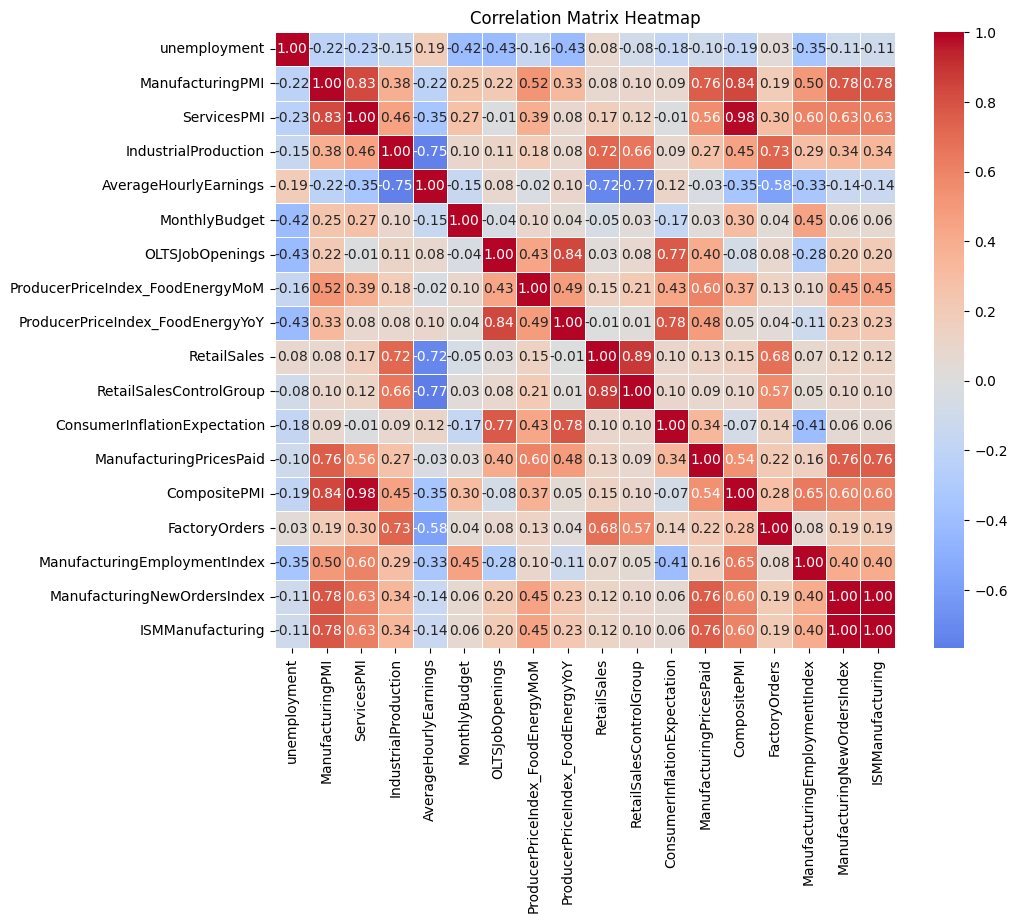

In [114]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Variance Inflation Factor (VIF)

<p>VIF is a metric that quantifies the extent of multicollinearity in a feature by measuring how much the variance of an estimated regression coefficient increases when that feature is added to the model. </br>
High VIF values (>5 or 10) suggest the presence of multicollinearity.</P>

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = numeric_df.columns
vif['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

print(vif)

                             Feature          VIF
0                       unemployment    23.291467
1                   ManufacturingPMI  1415.395531
2                        ServicesPMI  4700.881484
3               IndustrialProduction     4.039377
4              AverageHourlyEarnings     6.132958
5                      MonthlyBudget     2.347568
6                    OLTSJobOpenings    53.002096
7   ProducerPriceIndex_FoodEnergyMoM     3.285718
8   ProducerPriceIndex_FoodEnergyYoY    15.069689
9                        RetailSales     9.400368
10           RetailSalesControlGroup     9.251688
11      ConsumerInflationExpectation   205.586168
12           ManufacturingPricesPaid    69.087289
13                      CompositePMI  5888.263164
14                     FactoryOrders     2.685779
15      ManufacturingEmploymentIndex   270.157352
16       ManufacturingNewOrdersIndex          inf
17                  ISMManufacturing          inf


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


### <a id='toc1_2_5_'></a>[Feature Selection](#toc0_)

#### Combine Feature which are highly correlated with each other from above figure

In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data (mandatory for PCA)
scaler = StandardScaler()
X_std = scaler.fit_transform(final_df)

# print(X_std)

# Apply PCA to reduce the dimensionality to 1 component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

print(X_pca)
# Add the reduced component as a new column in the DataFrame
final_df['PCA_Component'] = X_pca

# Plot the reduced data with PCA
plt.figure(figsize=(8, 6))
plt.scatter(df['PCA_Component'], np.zeros(len(df)), marker='o')
plt.xlabel('PCA Component')
plt.yticks([])  # Hide y-axis labels
plt.title('PCA: E-commerce Customer Data with Feature Selection')
plt.grid(True)
plt.show()

In [107]:
print(final_df.describe())

       unemployment  ManufacturingPMI  ServicesPMI  IndustrialProduction  \
count   1370.000000       1370.000000  1370.000000           1370.000000   
mean       5.241314         53.807226    53.783358              0.116131   
std        2.150377          4.430400     5.616342              1.653293   
min        3.400000         36.100000    26.700000            -11.200000   
25%        3.700000         51.400000    51.600000             -0.200000   
50%        4.600000         53.800000    54.700000              0.200000   
75%        5.900000         56.500000    56.100000              0.700000   
max       14.700000         63.400000    70.400000              5.400000   

       AverageHourlyEarnings  MonthlyBudget  OLTSJobOpenings  \
count            1370.000000    1370.000000      1370.000000   
mean                0.292752    -126.566095         7.283588   
std                 0.552966     178.290375         2.538492   
min                -1.200000    -864.000000         0.00000

In [108]:
# Loop through each column
for column in final_df.columns:    
    print(column);

unemployment
ManufacturingPMI
ServicesPMI
IndustrialProduction
AverageHourlyEarnings
MonthlyBudget
OLTSJobOpenings
ProducerPriceIndex_FoodEnergyMoM
ProducerPriceIndex_FoodEnergyYoY
RetailSales
RetailSalesControlGroup
ConsumerInflationExpectation
ManufacturingPricesPaid
CompositePMI
FactoryOrders
ManufacturingEmploymentIndex
ManufacturingNewOrdersIndex
ISMManufacturing


In [109]:
from sklearn.model_selection import train_test_split
X = final_df.drop('unemployment',axis=1) # Independet variable
y = final_df['unemployment'] # dependent variable

print(X.tail(2))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

      ManufacturingPMI  ServicesPMI  IndustrialProduction  \
1368              56.0         55.9                  -0.3   
1370              56.0         55.9                  -0.3   

      AverageHourlyEarnings  MonthlyBudget  OLTSJobOpenings  \
1368                    0.3         -176.4             3.93   
1370                    0.3         -176.4             3.93   

      ProducerPriceIndex_FoodEnergyMoM  ProducerPriceIndex_FoodEnergyYoY  \
1368                               0.2                               1.8   
1370                               0.2                               1.8   

      RetailSales  RetailSalesControlGroup  ConsumerInflationExpectation  \
1368          0.5                     -0.4                           2.3   
1370          0.5                     -0.4                           3.1   

      ManufacturingPricesPaid  CompositePMI  FactoryOrders  \
1368                     67.0          58.6           -5.7   
1370                     67.0          58.6 

In [110]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

LinAlgError: Singular matrix

In [ ]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

NameError: name 'theta' is not defined

In [ ]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

NameError: name 'parameter_df' is not defined

In [ ]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.0
R square obtain for normal equation method is : 1.0


In [ ]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  1.929808459875825
R square obtain for scikit learn library is : 0.5039055643938831


C:\Users\ACER\AppData\Local\Temp\ipykernel_23796\3006966529.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


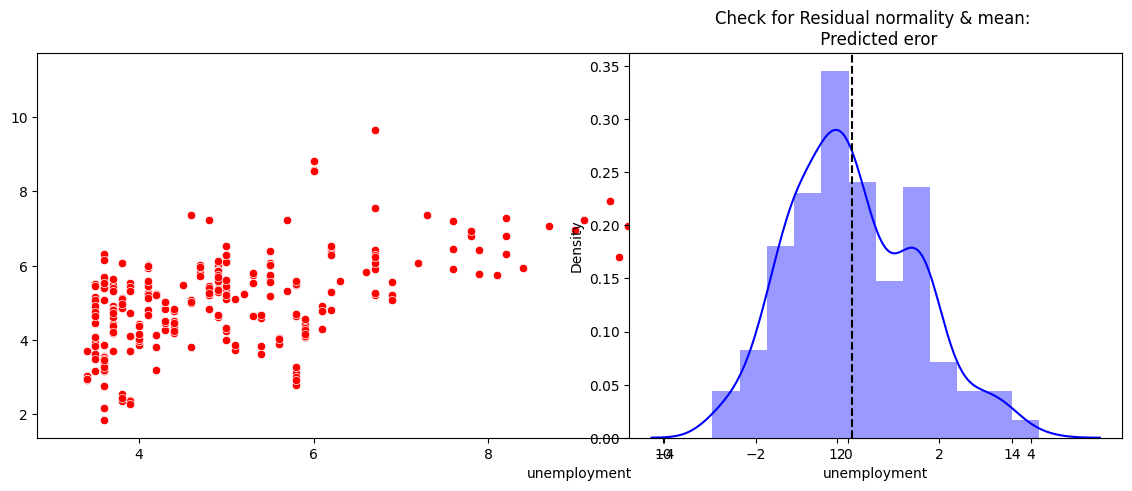

In [ ]:
# Check for Linearity
f = plt.figure(figsize=(14,5))

# sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
sns.scatterplot(x=y_test,y=y_pred_sk, color='r')
# sns.scatterplot(data = ax, color='b')


# ax.set_title('Check for Linearity:\n Unemployed Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Predicted eror');

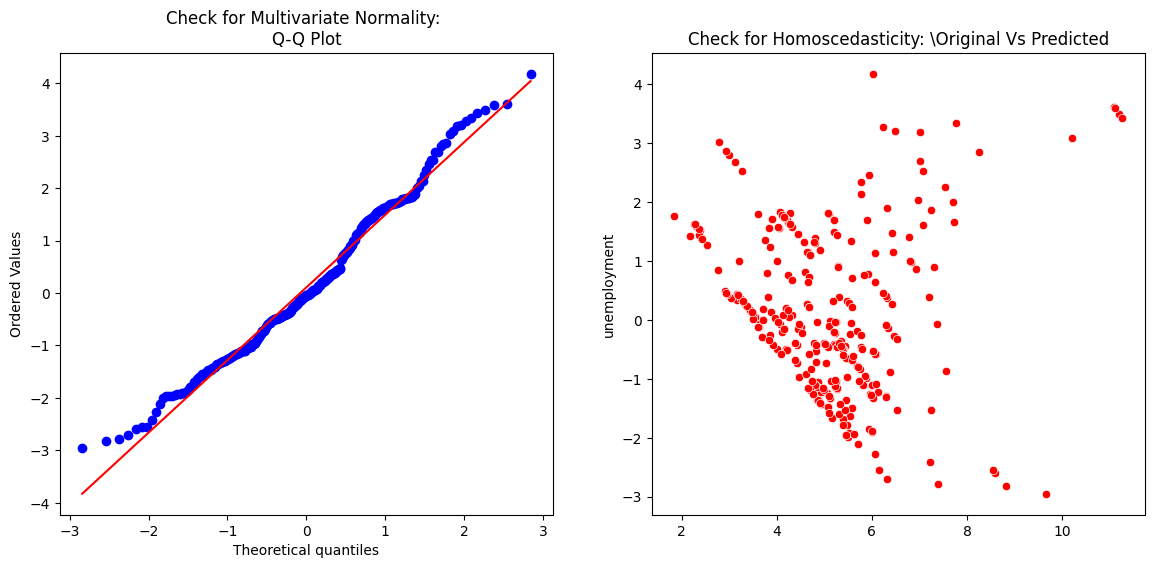

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \Original Vs Predicted');

In [ ]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

2.015745245717628

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have a separate test dataset X_test and y_test

# Predict on the test data
y_pred = lin_reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)

R-squared: 0.5039055643938831
Mean Squared Error (MSE): 1.929808459875825


# <a id='toc2_'></a>[Logistic Regression](#toc0_)


In [ ]:

X = final_df.drop('unemployment',axis=1) # Independet variable
y = final_df['unemployment'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

ValueError: Unknown label type: 'continuous'